# Automatic source detection

In most of SITELLE data cubes there are numerous point-like emission-line objects which velocity is unknown. There is a simple algorithm which can help in their discovery. This algorithm is described in Martin et al. 2017 (http://arxiv.org/abs/1707.01366) and is based on the measurement of the highest emission of each pixel with respect to its neighbourhood. It delivers a map if the net emission which helps in detecting point-like emission but minimizes the diffuse emission.

Two versions of the algorithm (one fast and the one much slower) can be choosen. the fast version will take less than half an hour and will deliver a map with some artifacts but which gives a good idea of what can be obtained with the much slower algorithm.

In [1]:
# import base class for the manipulation of a SITELLE spectral cube: HDFCube
from orcs.process import SpectralCube
import pylab as pl
import numpy as np
cube = SpectralCube('/home/thomas/M31_SN3.merged.cm1.1.0.hdf5')

master.03e73|INFO| Cube is level 3
master.03e73|INFO| shape: (2048, 2064, 840)
master.03e73|INFO| wavenumber calibration: True
master.03e73|INFO| flux calibration: True
master.03e73|INFO| wcs calibration: True


In [2]:
cube.detect_sources(fast=True)

master.03e73|INFO| Source detection using fast algorithm
master.03e73|INFO| Signal range: [14598.54014599 15439.24656477] cm-1, (277, 597) pixels
master.03e73|INFO| Extracting frames: 277 to 312 (35/320 frames)
master.03e73|INFO| Init of the parallel processing server with 32 threads
master.03e73|INFO| Closing parallel processing server
master.03e73|WARNING| /home/thomas/Astro/Python/ORB/Orcs/orcs/process.py:516: ComplexWarning: Casting complex values to real discards the imaginary part
  det_frame[new_det] = imax_frame[new_det]

master.03e73|INFO| Extracting frames: 312 to 348 (71/320 frames)
master.03e73|INFO| Init of the parallel processing server with 32 threads
master.03e73|INFO| parallel processing closed
master.03e73|INFO| Closing parallel processing server
master.03e73|INFO| Extracting frames: 348 to 383 (106/320 frames)
master.03e73|INFO| Init of the parallel processing server with 32 threads
master.03e73|INFO| parallel processing closed
master.03e73|INFO| Closing parallel pro

Here the file `./M31_SN3/M31_SN3.SpectralCube.detection_frame.fits` is the generated detection map. You can see below a small excerpt of the detection map where numerous emission sources are visible which were undetectable in the deep frame.

Text(0.5, 1.0, 'detection image')

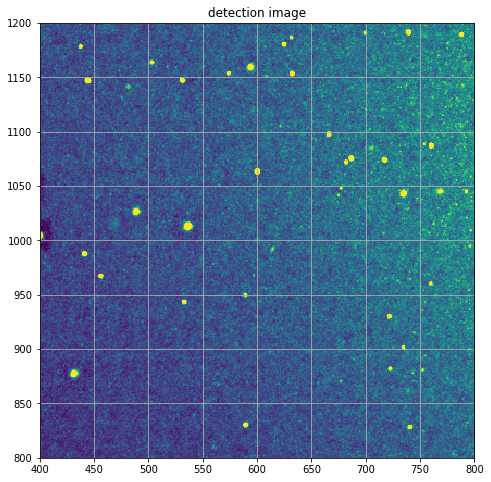

In [8]:
import orb.utils.io as io
detect_map = io.read_fits('./M31_SN3/M31_SN3.SpectralCube.detection_frame.fits')
pl.figure(figsize=(8,8))
pl.imshow(detect_map.T, vmin=np.nanpercentile(detect_map,5),
         vmax = np.nanpercentile(detect_map, 99))
pl.xlim((400,800))
pl.ylim((800,1200))
pl.grid()
pl.title('detection frame')

Text(0.5, 1.0, 'deep frame')

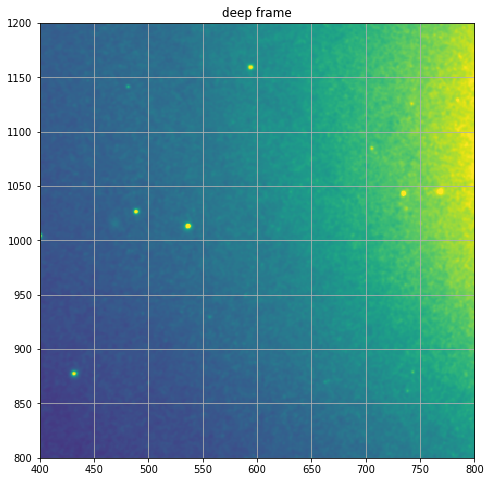

In [9]:
df = cube.get_deep_frame()
df.imshow(wcs=False, figsize=(8,8), perc=95)
pl.xlim((400,800))
pl.ylim((800,1200))
pl.grid()
pl.title('deep frame')